# Guide to make_plot.py

make_plot.py is a tool for gravitational wave analysis. It was originally designed for the LISA gravitational wave mission, but has broad applications. It provides a gridded array of plots for comparisons of sensitivity curves and/or binary parameters. This guide will walk you through the uses of this code, including using varying inputs for different outputs. Therefore, included here is information on how to create the configuration file (make_plot_config.json). For specific information on the code structure, classes used, and class and function inputs, please refer to the code documentation by using the python function help(make_plot). Please refer to and cite (###ADD SUBMITTED LINK HERE ###) for this usage of this tool and an example of its application. 

## Generic Inputs

make_plot.py takes as an input, a gridded data set with columns representing the x values, y values, and z values. For this particular application, and throughout the guide, the x value will be the signal-to-noise ratio (SNR), but the tool itself is generic to whatever z value the user prefers. 

This input can take the form of a file (like the output from generate_contour_data.py), or can be in the form a dict within a code or notebook. In this guide, I will use both to show booth options. The main difference is json has lower case true and false for boolean, while python has True and False. 

## Basic Outputs

In this section I will describe the three basic types of plots this tool can produce. To do this, I will import the code and create my own dict in this notebook containing desired inputs. The dict will exactly resemble what can be assembled using a json file besides the boolean capitalization. 

In [1]:
from make_plot import plot_main
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np

## Waterfall Plot

The waterfall plot is a general filled contour plot. You can define values for the contours, but there are default values shown in the plot below. These plots resemble those shown in the LISA Mission Proposal.

In [2]:
waterfall_dict = {
"general":{
    "WORKING_DIRECTORY": ".",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": True,
    "output_path": "test_new.pdf",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,

    "num_rows": 1,
    "num_cols": 1,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",

    "fig_y_label": "Redshift",
    "fig_x_label": "Total Mass ($M_\odot$)"
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt","label":"LISA_prop_curve_all"}
            ],
        "type": "Waterfall"
        }
    }
}


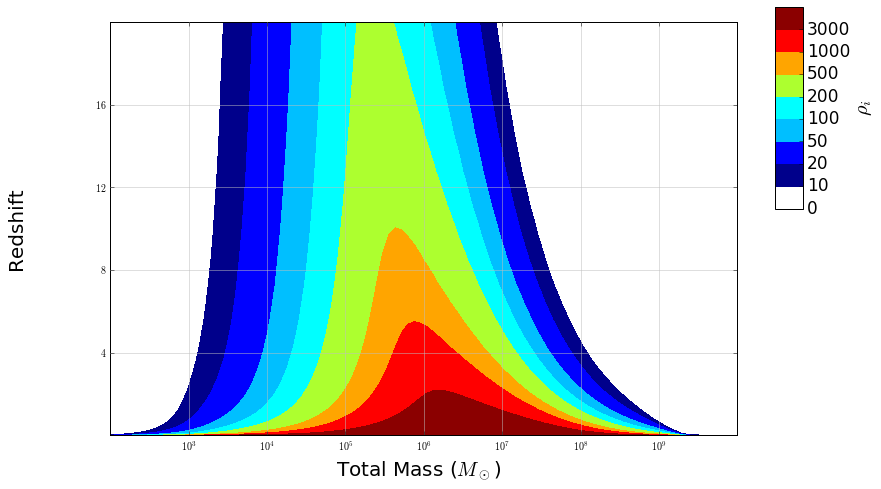

In [3]:
plot_main(waterfall_dict)

## Ratio Difference and Loss/Gain Contours

Ratio difference plots show the log10 of the ratio of the SNR from one dataset to another.

$\log_{10}{\frac{\rho_1}{\rho_2}}$

The first dataset is inputed as the file ($\rho_1$). It is then compared against the "control" ($\rho_2$). The loss (gain) contours refer to sources from the first dataset with an SNR above (below) a certain value, while the second dataset has an SNR below (above) that same value. This value can be set as the "SNR_CUT" global variable, or specifically for the plot of interest with the "snr_contour_value" option. Filled grey contour lines indicate gained sources while dashed lines indicate lost sources.

In [4]:
ratio_dict = {
"general":{
    "WORKING_DIRECTORY": ".",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": True,
    "output_path": "test_new.pdf",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,

    "num_rows": 1,
    "num_cols": 1,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Ratio",
        "control":
            {"name":"Sense_output/HBW_q5_sn65_D.txt.txt",
             "label":"LISA_prop_curve_all"},
        "label":
            {"title": "Parallel vs. Anti-Parallel Spins", 
             "title_fontsize": 18,  "xlabel": r"Total Mass ($M_\odot$)", 
             "ylabel": "Redshift"},
        }
    }
}



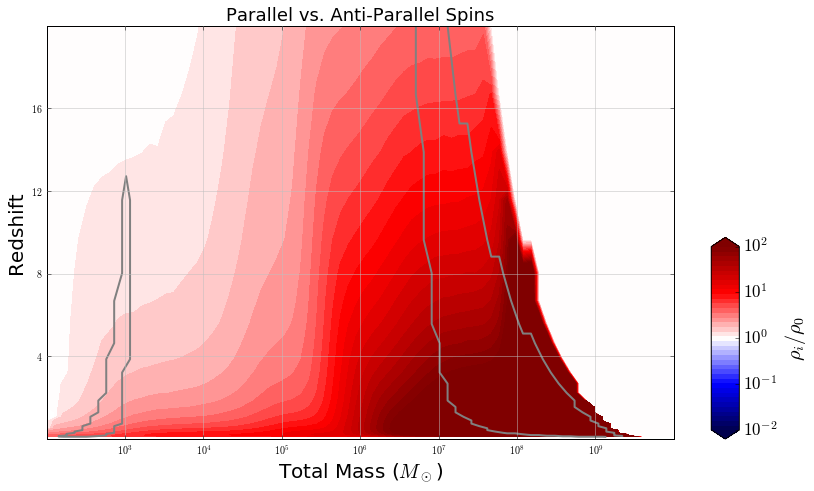

In [5]:
plot_main(ratio_dict)

## Horizon Plot

Horizon plots are helpful for comparing more than two parameters. They show contour lines at either "SNR_CUT" or a specified value. 

In [6]:
horizon_dict = {
"general":{
    "WORKING_DIRECTORY": ".",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": True,
    "output_path": "test_new.pdf",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,
    "spacing": "wide",

    "num_rows": 1,
    "num_cols": 1,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"LISA_prop_curve_all"},
            {"name":"Sense_output/HBW_q50_s65_D.txt",
             "label":"LISA_prop_curve_all"},
            {"name":"Sense_output/HBW_q500_s65_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Horizon",
        "label":
            {"title": "Mass Ratio Comparisons", 
             "title_fontsize": 18,  "xlabel": r"Total Mass ($M_\odot$)", 
             "ylabel": "Redshift"},

        
        "legend":
            {
            "labels": ["q=5", "q=50", "q=500"],
            "loc": "upper right",
            "size":13,
            "ncol": 2
            },
        }
    }
}



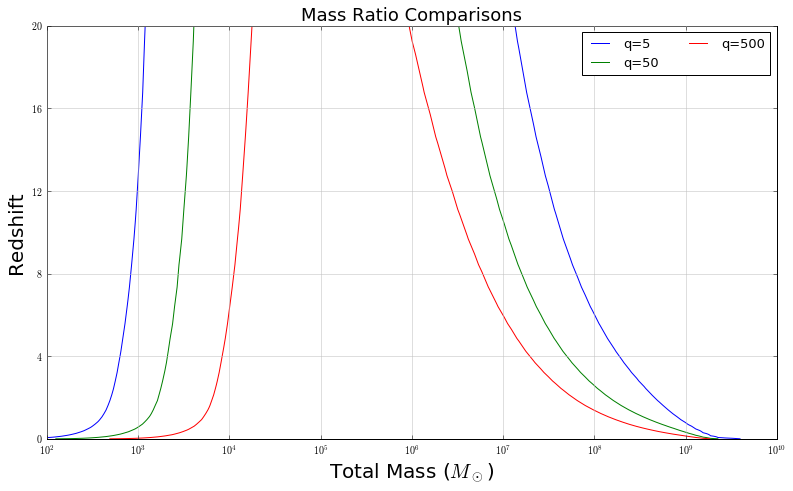

In [7]:
plot_main(horizon_dict)

## Example 1: Comparison of Sensitivity Curves to Base Curve

In [8]:
example_1_dict = {
"general":{
    "WORKING_DIRECTORY": ".",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": False,
    "output_path": "",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,
    "spacing": "tight",
    "fig_y_label": "Redshift",
    "fig_x_label": r"Total Mass ($M_\odot$)",

    "num_rows": 5,
    "num_cols": 2,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {

    "0":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL"}
        },
        
    "1":{
        "indices": [0, 2, 4, 6, 8],
        "type": "Horizon",
        "legend":
            {
            "labels": ["PL", "CL", "PLHB", "PLCS", "CLLF"],
            "loc": "lower center",
            "size":10,
            "ncol": 1
            }
        },
        
    "2":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"Classic_LISA_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CL"}
        },
    "3":{
        "indices": 2,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "4":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"LISA_prop_curve_early_break_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PLHB"}
        },
    "5":{
        "indices": 4,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "6":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"LISA_prop_curve_less_steep_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PLCS"}
        },
    "7":{
        "indices": 6,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "8":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"Classic_LISA_prop_behavior_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "CLLF"}
        },
    "9":{
        "indices": 8,
        "control":
            {"index": 0},
        "type": "Ratio",
        }
    }
}




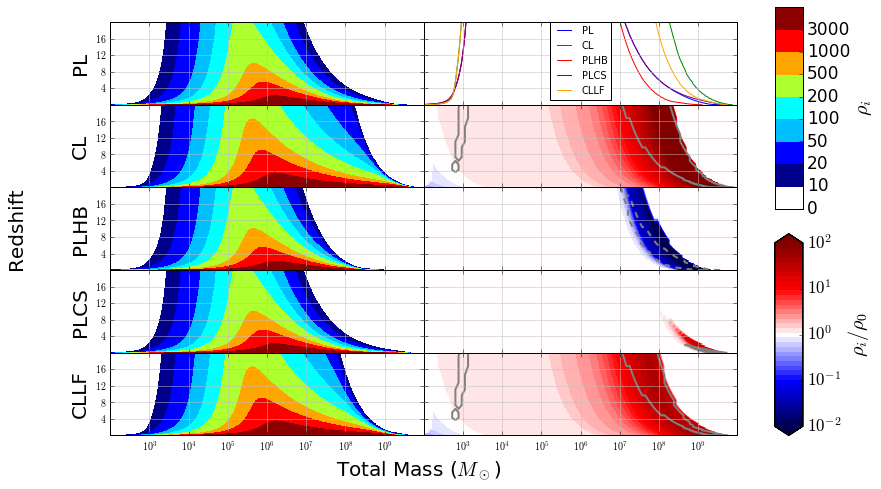

In [9]:
plot_main(example_1_dict)

## Example 2: Comparing Multiple Curves to Each Other

In [14]:
example_2_dict = {
"general":{
    "WORKING_DIRECTORY": ".",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": True,
    "output_path": "gridded_sense_curves.png",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,
    "spacing": "tight",
    "adjust_figure_bottom": 0.15,
    "fig_y_label": "Redshift",
    "fig_x_label": r"Total Mass ($M_\odot$)",

    "num_rows": 3,
    "num_cols": 3,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {
    #set diagonals
    "0":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "PL"}
        },
        
    "4":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"Classic_LISA_all"}
            ],
        "type": "Waterfall",
        },
    "8":{
        "file":[
            {"name":"Sense_output/HBW_q5_s65_D.txt",
             "label":"Classic_LISA_prop_behavior_all"}
            ],
        "type": "Waterfall",
        "label":
            {"xlabel": "CLLF"}
        },
    #set upper diagonals - ratio
    "1":{
        "indices": 4,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "2":{
        "indices": 8,
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "5":{
        "indices": 8,
        "control":
            {"index": 4},
        "type": "Ratio",
        },
    #set lower diagonals - horizon
    "3":{
        "indices": [0,4],
        "type": "Horizon",
        "label":
            {"ylabel": "CL"},
        "legend":
            {
            "labels": ["PL", "CL"],
            "loc": "lower center",
            "size":10,
            "ncol": 1
            },
        "extra":
            {
            "snr_contour_value":1e2    
            }
        },
    "6":{
        "indices": [0,8],
        "type": "Horizon",
        "label":
            {"xlabel": "PL", "ylabel": "CLLF"},
        "legend":
            {
            "labels": ["PL", "CLLF"],
            "loc": "lower center",
            "size":10,
            "ncol": 1
            },
        "extra":
            {
            "snr_contour_value":1e2    
            }
        },
    "7":{
        "indices": [4,8],
        "type": "Horizon",
        "label":
            {"xlabel":"CL"},
        "legend":
            {
            "labels": ["CL", "CLLF"],
            "loc": "lower center",
            "size":10,
            "ncol": 1
            },
        "extra":
            {
            "snr_contour_value":1e2    
            }
        }
    }
}


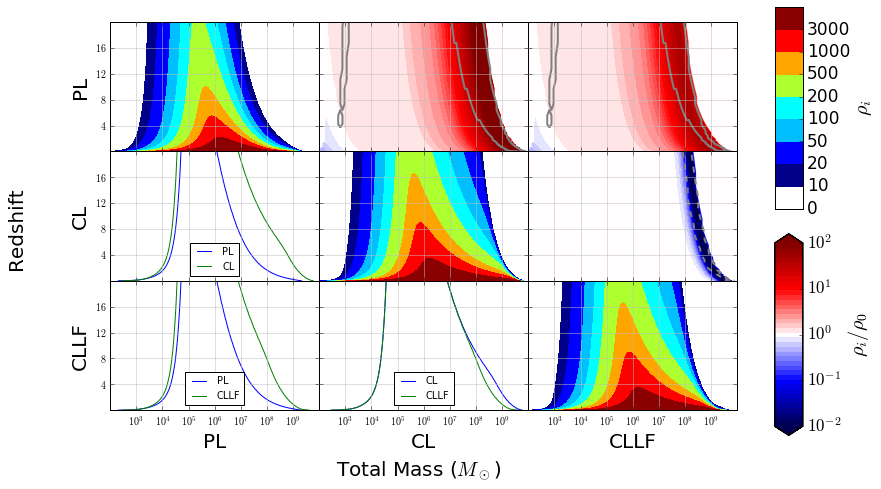

In [15]:
plot_main(example_2_dict)

## Example 3: Comparison Across Parameters

In [17]:
example_3_dict = {
"general":{
    "WORKING_DIRECTORY": ".",

    "SNR_CUT": 5.0,

    "show_figure": True,

    "save_figure": True,
    "output_path": "parameter_walk_through.pdf",

    "x_column_label": "M_s",
    "y_column_label": "z", 

    "figure_width": 13.0,
    "figure_height": 7.0,
    "spacing": "tight",
    "adjust_figure_bottom": 0.15,
    "fig_y_label": "Redshift",
    "fig_x_label": r"Total Mass ($M_\odot$)",

    "num_rows": 3,
    "num_cols": 3,

    "xlims": [2.0, 10.0],
    "dx": 1.0,
    "xscale": "log",

    "ylims": [0.0, 20.0],
    "dy": 4.0,
    "yscale": "lin",
    },



"plot_info":
    {
    #set diagonals
    "0":{
        "file":[
            {"name":"Sense_output/HBW_q5_s99_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "type": "Waterfall",
        "label":
            {"ylabel": "S=0.99"}
        },
    "1":{
        "file":[
            {"name":"Sense_output/HBW_q50_s99_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "2":{
        "file":[
            {"name":"Sense_output/HBW_q500_s99_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "3":{
        "file":[
            {"name":"Sense_output/HBW_q5_s0_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "4":{
        "file":[
            {"name":"Sense_output/HBW_q50_s0_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "5":{
        "file":[
            {"name":"Sense_output/HBW_q500_s0_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "6":{
        "file":[
            {"name":"Sense_output/HBW_q5_sn99_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "7":{
        "file":[
            {"name":"Sense_output/HBW_q50_sn99_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
        },
    "8":{
        "file":[
            {"name":"Sense_output/HBW_q500_sn99_D.txt",
             "label":"LISA_prop_curve_all"}
            ],
        "control":
            {"index": 0},
        "type": "Ratio",
        } 
    }
}

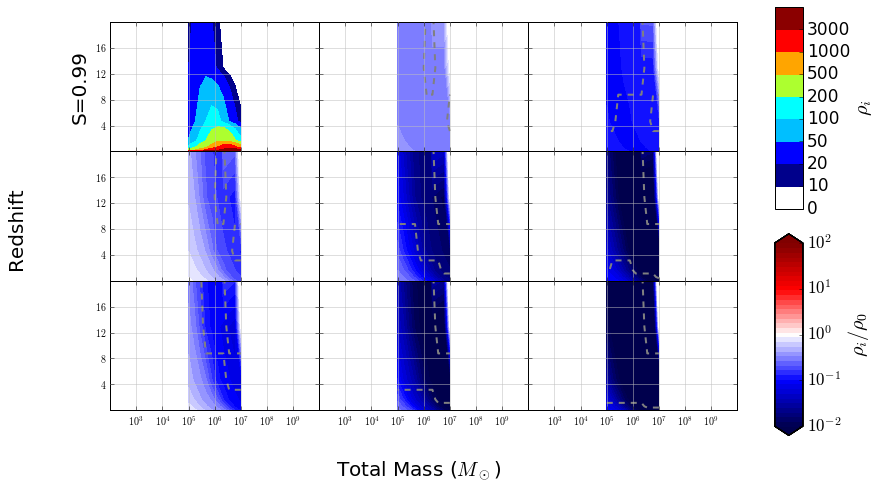

In [23]:
plot_main(example_3_dict)

In [19]:
from astropy.io import ascii

In [22]:
ascii.read('Sense_output/HBW_q5_sn99_D.txt')['M_s']

100000.0
166810.05372
278255.940221
464158.883361
774263.682681
1291549.66501
2154434.69003
3593813.6638
5994842.50319
10000000.0
100000.0
